# K-means (k均值聚类） 
* 1、初始化K个聚类中心$C_k$ 
* 2、按就近原则将数据分簇 
* 3、更新聚类中心
$
{{\rm{C}}_k} = \frac{1}{{{N_k}}}\sum\limits_{{x_{\rm{i}}} \in {\rm{k簇}}}^{} {{x_i}} 
$ 
* 4、迭代输出

In [1]:
# 导入相关包
import numpy as np
import matplotlib.pyplot as plt
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [2]:
# 构造聚类中心
# dataset [N, D]
# K 聚类中心的数目 [K, D]
def creat_centers(datasetm, K):
    """在X的值域内均匀取值"""
    val_max = np.max(datasetm, axis = 0)
    val_min = np.min(datasetm, axis = 0)
    centers = np.linspace(val_min, val_max, num = K+2)
    return centers[1:-1, :]

In [3]:
# K-means 绘图
# dataset [N, D]
# lab (N, )
# dic_colors K 种颜色
# centers [K, D]
def draw_kmeans(dataset, lab, centers, dic_colors = None, name = '0'):
    plt.cla()

    n_lab = set(lab.tolist())

    for i, val in enumerate(n_lab):
        index = np.where(lab == val)[0]
        sub_dataset = dataset[index, :]
        plt.scatter(sub_dataset[:, 0], sub_dataset[:, 1], s=16., color = dic_colors[i])
    for i in range(np.shape(centers)[0]): 
        plt.scatter(centers[i,0], centers[i, 1], color = "k", marker="+",s = 200.)
    plt.title(name)
    plt.show()

In [4]:
def run_kmeans(dataset, K, m=20, dic_colors = None, b_draw = False):
    N, D = np.shape(dataset)
    #确定聚类中心
    centers = creat_centers(dataset, K)
    # 初始化聚类结果
    labs = np.zeros(N)
    if b_draw:
        draw_kmeans(dataset, labs, centers, dic_colors, name = 'pre_train')
    # 进行m次迭代
    for it in range(m) :
        # 计算每个点距离中心的距离
        dist = np.zeros([N, K])
        for k in range(K):
            center = centers[k, :]
            # 计算欧氏距离
            diff2 = ((np.tile(center, (N, 1)) - dataset)**2).sum(axis = 1)
            dist[:, k] = diff2
        # 距离排序，进行聚类
        labs_new = np.argmin( dist, axis = 1)
        error = np.sum(np.min(dist, axis = 1))/N 
        # print("第 %d 次聚类，聚类误差 %.2f"%(it + 1, error))
        # 更新聚类中心
        for k in range(K):
            index = np.where(labs_new == k)[0]
            centers[k, :] = np.mean( dataset[index, :], axis = 0)
        # 绘图
        if b_draw: 
            draw_kmeans(dataset, labs_new, centers, dic_colors, name = "第 %d 次迭代"%(it+1))
        if np.sum(labs_new - labs) == 0: 
            return labs_new
        else: 
            labs = labs_new
    return labs

In [5]:
# test
# 导入数据
from sklearn.datasets import load_iris
iris = load_iris()
X_train = iris.data
y_train = iris.target

In [6]:
# 定义颜色
dic_colors = ['r', 'b', 'y']
y_test = run_kmeans(X_train, 3, 3, dic_colors, False)

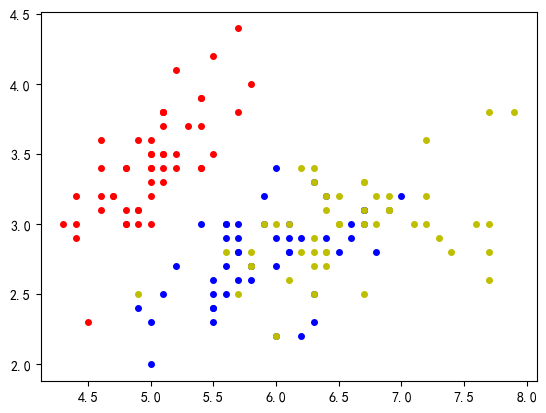

In [7]:
plt.cla()
for i, val in enumerate(set(y_train.tolist())):
    idx = np.where( y_train == val)[0]
    data = X_train[idx, :]
    plt.scatter(data[:, 0], data[:, 1], s=16., color = dic_colors[i])
plt.show()

In [8]:
# 生成环形数据
from sklearn.datasets import make_circles

X_train, y_train = make_circles(n_samples = 1000, factor = 0.5, noise = 0.1)


In [9]:
# 绘图
def draw_test(datasets, labs, dic_colors = None, name = ''): 
    plt.cla()

    n_lab = set(labs.tolist())
    for i, val in enumerate(n_lab): 
        index = np.where( labs == val )[0]
        sub_dataset = datasets[index, : ]
        plt.scatter(sub_dataset[:, 0], sub_dataset[:, 1], s=16.,color = dic_colors[i])
    plt.title(name)
    plt.show()

dic_colors = ['r', 'g', 'b']

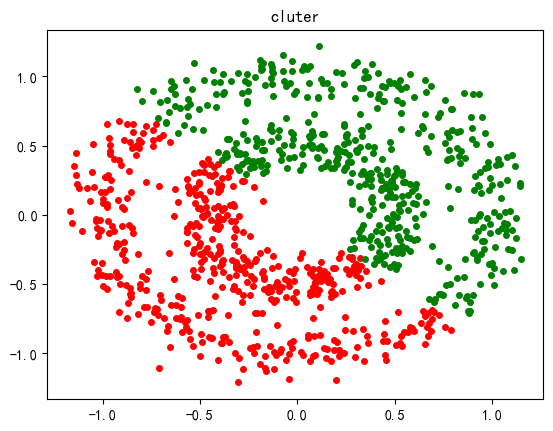

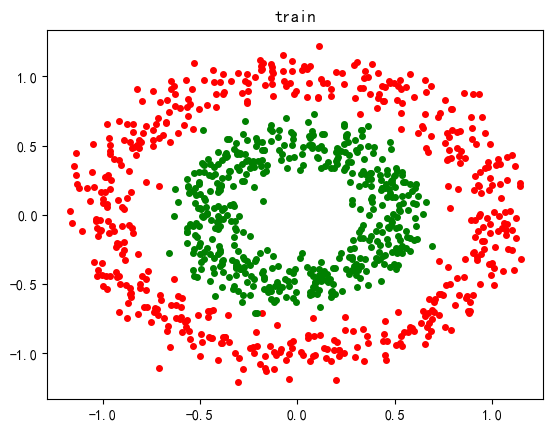

In [10]:
# K-means训练环形数据
y_pre = run_kmeans(X_train, 2, 3, dic_colors, False)
draw_test(X_train, y_pre, dic_colors,'cluter')
draw_test(X_train, y_train, dic_colors, 'train')

In [11]:
# 高斯核函数
def gaussian_kernel(x0, x1, gamma): 
    return np.exp(-gamma*((x0 - x1)**2).sum())
# 计算K 
def gaussian_K(X, gamma): 
    N, D = np.shape(X)
    dist_matrix = np.zeros((N, N), dtype = float)
    for i in range(N):
        for j in range(N):
            dist_matrix[i, j] = gaussian_kernel(X[i], X[j], gamma)
    return dist_matrix

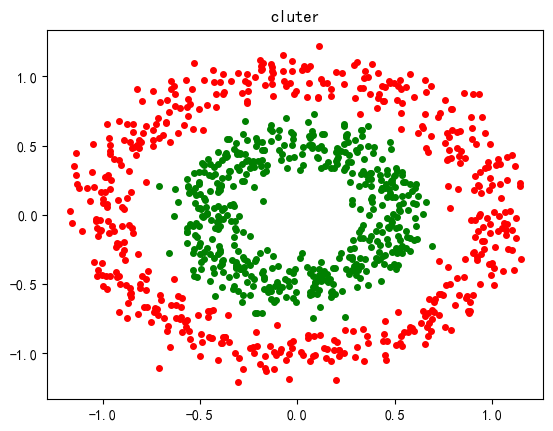

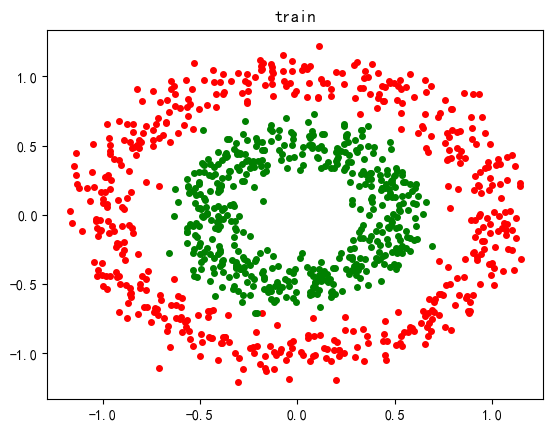

In [12]:
# K-means训练经高斯核函数后的环形数据
X_K = gaussian_K(X_train, 0.8)
y_pre = run_kmeans(X_K, 2, 3, dic_colors, False)
draw_test(X_train, y_pre, dic_colors,'cluter')
draw_test(X_train, y_train, dic_colors, 'train')